In [4]:
#importing pandas library to read the data set

import pandas as pd

In [5]:
data=pd.read_csv("Food_preference.csv")
data.head() #displaying top 5 values of data 

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [6]:
# shape of data

data.shape

(288, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       288 non-null    object
 1   Participant_ID  288 non-null    object
 2   Gender          284 non-null    object
 3   Nationality     288 non-null    object
 4   Age             288 non-null    int64 
 5   Food            288 non-null    object
 6   Juice           288 non-null    object
 7   Dessert         288 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.1+ KB


In [8]:
#removing Participant_ID and Timestamp as they donthave any weight on analysis

ind_food=data.drop(["Participant_ID","Timestamp"],axis=1)
ind_food.head()

,Gender,Nationality,Age,Food,Juice,Dessert
0,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [9]:
#finding the count of nations involved

ind_food.Nationality.value_counts()

Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Maldivian        2
Japan            2
MY               2
Pakistani        2
Pakistan         1
Tanzanian        1
Indonesian       1
Indonesian       1
Malaysia         1
Seychellois      1
Yemen            1
China            1
Algerian         1
MALAYSIAN        1
Muslim           1
Canadian         1
Maldivian        1
Malaysia         1
Indonesain       1
Korean           1
Nigerian         1
Malaysian        1
Mauritian        1
Name: Nationality, dtype: int64

In [10]:
#picking only values of Indians

df = ind_food[ind_food['Nationality'] == 'Indian']


In [19]:
df.head(10)

,Gender,Nationality,Age,Food,Juice,Dessert
0,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,Male,Indian,27,Traditional food,Fresh Juice,Maybe
5,Male,Indian,24,Traditional food,Fresh Juice,Yes
6,Female,Indian,34,Traditional food,Fresh Juice,Yes
8,Female,Indian,19,Traditional food,Fresh Juice,Yes
9,Female,Indian,16,Western Food,Fresh Juice,Yes
11,Female,Indian,22,Traditional food,Fresh Juice,Yes


In [20]:
df=df.drop(["Nationality"],axis=1)

In [21]:
df

,Gender,Age,Food,Juice,Dessert
0,Male,24,Traditional food,Fresh Juice,Maybe
1,Female,22,Western Food,Carbonated drinks,Yes
2,Male,31,Western Food,Fresh Juice,Maybe
3,Female,25,Traditional food,Fresh Juice,Maybe
4,Male,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...
283,Male,27,Western Food,Fresh Juice,Yes
284,Male,24,Traditional food,Fresh Juice,Yes
285,Male,25,Traditional food,Fresh Juice,Yes
286,Male,27,Traditional food,Fresh Juice,Yes


In [25]:
ploting the countplot to differentiate the count of boys and girls 

In [57]:
df0= df['Gender'].value_counts().sort_index(ascending = True)
df0.head()

Female    149
Male       89
Name: Gender, dtype: int64

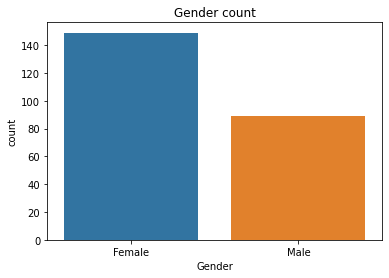

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x ='Gender', data = df)
plt.title('Gender count')
plt.show()





In [18]:
def age_buckets(x): 
    if x < 10: return '00-09' 
    elif x < 20: return '10-19' 
    elif x < 30: return '20-29' 
    elif x < 40: return '30-39'
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x < 80: return '70-79' 
    elif x < 90: return '80-89' 
    else: return 'other'

In [19]:
df['Agerange'] = df.Age.apply(age_buckets)
df.sort_values(by = ['Age'], ascending = True, inplace = True)
df.head()

<ipython-input-19-1ada66422b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agerange'] = df.Age.apply(age_buckets)
<ipython-input-19-1ada66422b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = ['Age'], ascending = True, inplace = True)


,Gender,Nationality,Age,Food,Juice,Dessert,Agerange
118,Female,Indian,8,Traditional food,Fresh Juice,No,00-09
177,Male,Indian,9,Western Food,Fresh Juice,Yes,00-09
157,Male,Indian,9,Traditional food,Fresh Juice,Maybe,00-09
240,Male,Indian,9,Traditional food,Fresh Juice,Yes,00-09
121,Male,Indian,12,Traditional food,Fresh Juice,No,10-19


In [20]:
df1= df['Agerange'].value_counts().sort_index(ascending = True)
df1.head()

00-09      4
10-19     14
20-29    102
30-39     76
40-49     26
Name: Agerange, dtype: int64

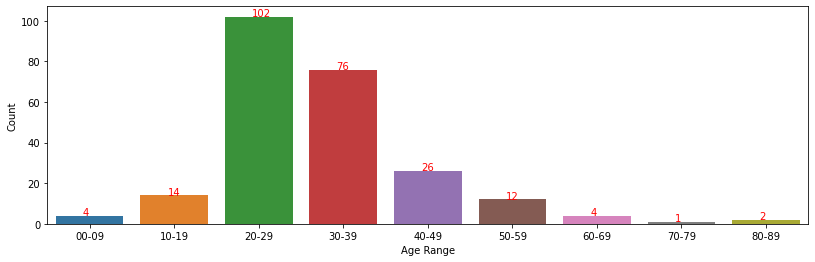

In [50]:
fig = plt.figure(figsize=(30,4))
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x=df['Agerange'],ax = ax2)
plt.xlabel('Age Range')
plt.ylabel('Count')

#displaying exact count on bars
for i, v in df1.reset_index().iterrows():
    ax2.text(i - 0.08, v.Agerange +0.3 , v.Agerange , color='red')
plt.show()

## Plotting food choice

In [26]:
#Finding the count of type of food
df2 = df['Food'].value_counts(ascending = False)
df2

Traditional food    204
Western Food         37
Name: Food, dtype: int64

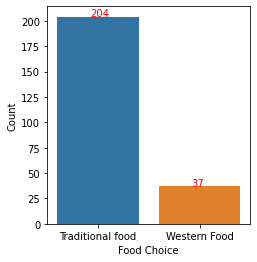

In [52]:
#Showing them using countplot

fig = plt.figure(figsize=(8,4))
ax3 = fig.add_subplot(1,2,1) #setting the length weidth and height of countplot
sns.countplot(x=df['Food'],ax = ax3)
plt.xlabel('Food Choice')
plt.ylabel('Count')

for i, v in df2.reset_index().iterrows():
    ax3.text(i - 0.08, v.Food +0.3 , v.Food , color='red')
plt.show()

## Ploting for juice choice

In [32]:
df3 = df['Juice'].value_counts(ascending = False)
df3

Fresh Juice          217
Carbonated drinks     24
Name: Juice, dtype: int64

In [ ]:
# Ploting the countplot for juice choice


fig = plt.figure(figsize=(8,4))
ax4 = fig.add_subplot(1,2,1)
sns.countplot(x=df['Juice'],ax = ax4)
plt.xlabel('Juice Choice')
plt.ylabel('Count')

for i, v in df3.reset_index().iterrows():
    ax4.text(i - 0.08, v.Juice +0.3 , v.Juice , color='red')
plt.show()

## Ploting for preferance for desert

In [37]:
df4 = df['Dessert'].value_counts(ascending = True)
df4

No        47
Yes       91
Maybe    103
Name: Dessert, dtype: int64

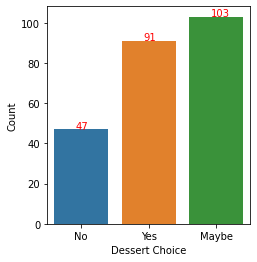

In [38]:
fig = plt.figure(figsize=(8,4))
ax5 = fig.add_subplot(1,2,1)
sns.countplot(x=df['Dessert'],ax = ax5)
plt.xlabel('Dessert Choice')
plt.ylabel('Count')

for i, v in df4.reset_index().iterrows():
    ax5.text(i - 0.08, v.Dessert +0.3 , v.Dessert , color='red')
plt.show()

## Finding the correlation for the attribets to gender 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Text(0.5, 0, 'Age Range')

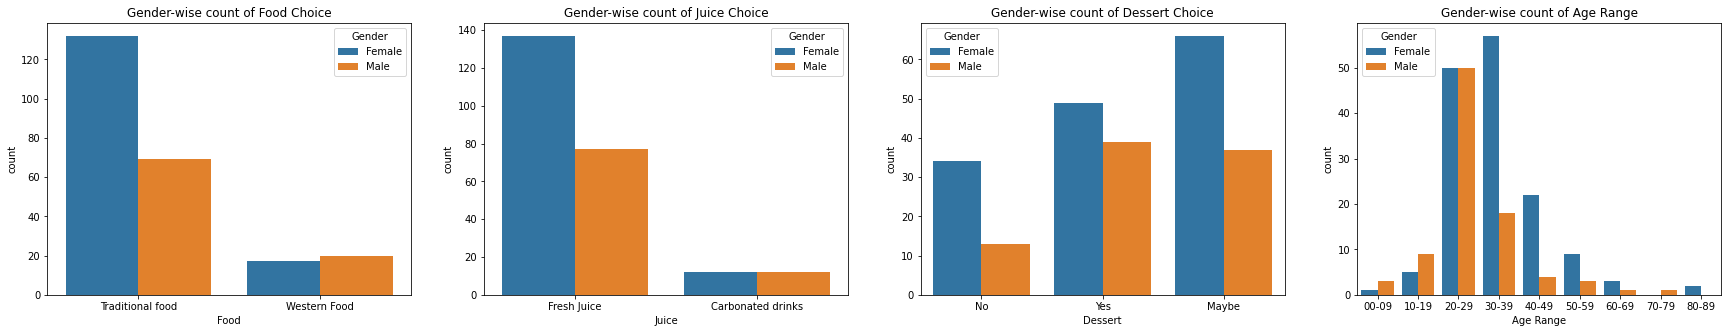

In [56]:
dims = (30, 5)
fig, ax = plt.subplots(1,4,figsize=dims)
ax[0].set(title = 'Gender-wise count of Food Choice')
sns.countplot('Food', hue = 'Gender', data = df, ax = ax[0])



ax[1].set(title = 'Gender-wise count of Juice Choice')
sns.countplot('Juice', hue = 'Gender', data = df, ax = ax[1])


ax[2].set(title = 'Gender-wise count of Dessert Choice')
sns.countplot('Dessert', hue = 'Gender', data = df, ax = ax[2])


ax[3].set(title = 'Gender-wise count of Age Range')
sns.countplot('Agerange', hue = 'Gender', data = df, ax = ax[3])
plt.xlabel('Age Range')

# This concludes that gender may not effect to the preference so if you are an Indian You Likely to have Traditional food along with fresh juice but dessert my be a choice